In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean
import math

## Example 2
### Construct the model

$$X_1 \sim \mathcal{N}(0,\sigma^2)$$
$$Y= X_1+\varepsilon_y$$
$$X_2=Y+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,\sigma^2)$$

$$\tilde{P}^{\sigma}(dX_1,dX_2,dY)=P(dX_1)W_{X_1}(dX_2)Q_{X_1}^{\sigma}(dy)$$ 
The linear regression model is equivariant.

The invariant loss function is $$MSE=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$.

The group action is $$gY=g(X_1+\varepsilon_1)=X_1+\varepsilon_1+\mathcal{N}(1,1)$$
$$gX_2=Y+\varepsilon_2$$

### (1) Risk function
$$\hat{f}_2(X_2)=\int \hat{f}(gX_1,X_2)\lambda(dg)$$
$\hat{f}_2(X_2)$ is invariant with $X_1$ and equivariant with $X_2$

In [138]:
def risk_2(n,sigma):
    list2=[]
    for i in range(1,11):
        X1_0=np.random.normal(0, sigma, n)
        X1=X1_0+np.random.normal(1, 1, n)
        Y=X1+np.random.normal(0,sigma, n)
        X2=Y+np.random.normal(0, 1, n)
        X=np.hstack([X1.reshape(-1,1), X2.reshape(-1,1)])
        y=np.hstack([Y.reshape(-1,1)])
        reg=LinearRegression().fit(X, y)
        pred=reg.predict(X)
        list2.append(sum((y-pred)**2)/n) #compute the loss function for each sigma
    return sum(list2)/10

### (2) Risk function 
$$\hat{f}_1(X_1)=\int \hat{f}(X_1,gX_2)\lambda(dg)$$
$\hat{f}_1(X_1)$ is invariant with $X_2$ and equivariant with $X_1$

In [139]:
def risk_1(n,sigma):
    list1=[]
    for i in range(1,11):
        X1_0=np.random.normal(0, sigma, n)
        X1=X1_0
        Y=X1+np.random.normal(0,sigma, n)
        X2_0=Y+np.random.normal(0,1, n)
        X2=X2_0+np.random.normal(1, 1, n)
        X=np.hstack([X1.reshape(-1,1), X2.reshape(-1,1)])
        y=np.hstack([Y.reshape(-1,1)])
        reg=LinearRegression().fit(X, y)
        pred=reg.predict(X)
        list1.append(sum((y-pred)**2)/n)
    return sum(list1)/10

$$\sigma=1$$

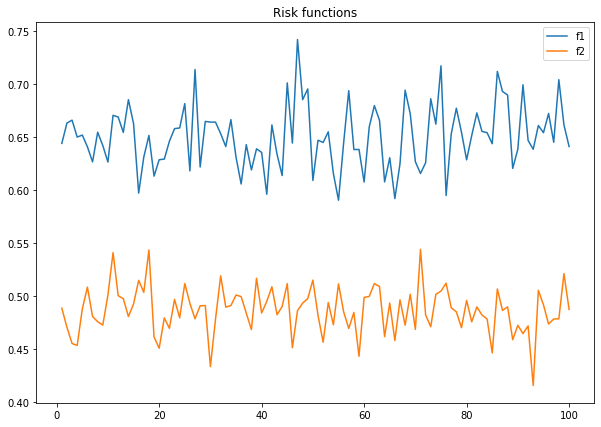

In [140]:
list1=[]
list2=[]


for i in range(100):
    list1.append(risk_1(100,1))
    list2.append(risk_2(100,1))
   
 
plt.figure(figsize=(10,7))
   
plt.plot(range(1,101),list1,label='f1')
plt.plot(range(1,101),list2,label='f2')

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()

In [128]:
list1

[array([0.58263299]),
 array([0.68204582]),
 array([0.64014626]),
 array([0.66942781]),
 array([0.58510188]),
 array([0.63198247]),
 array([0.65487738]),
 array([0.66275256]),
 array([0.65214017]),
 array([0.63076463]),
 array([0.61717649]),
 array([0.62196298]),
 array([0.5776767]),
 array([0.62472555]),
 array([0.63993428]),
 array([0.63640325]),
 array([0.6039401]),
 array([0.61899916]),
 array([0.66455014]),
 array([0.67504365]),
 array([0.6424812]),
 array([0.60705157]),
 array([0.67564743]),
 array([0.63494167]),
 array([0.67875215]),
 array([0.66162853]),
 array([0.70714572]),
 array([0.64511299]),
 array([0.60796645]),
 array([0.63733608]),
 array([0.66408845]),
 array([0.63848893]),
 array([0.61652511]),
 array([0.62278529]),
 array([0.64288905]),
 array([0.64171909]),
 array([0.61532724]),
 array([0.64051661]),
 array([0.68408513]),
 array([0.66241856]),
 array([0.65661457]),
 array([0.63535054]),
 array([0.69246093]),
 array([0.66998983]),
 array([0.67156401]),
 array([0.665

$$\sigma=10$$

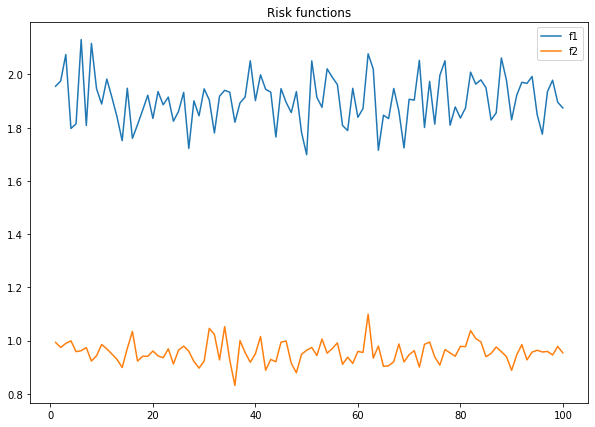

In [129]:
list1=[]
list2=[]


for i in range(100):
    list1.append(risk_1(100, 10))
    list2.append(risk_2(100, 10))
   
 
  
plt.figure(figsize=(10,7))   
plt.plot(range(1,101),list1,label='f1')
plt.plot(range(1,101),list2,label='f2')

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()

$$\sigma=100$$

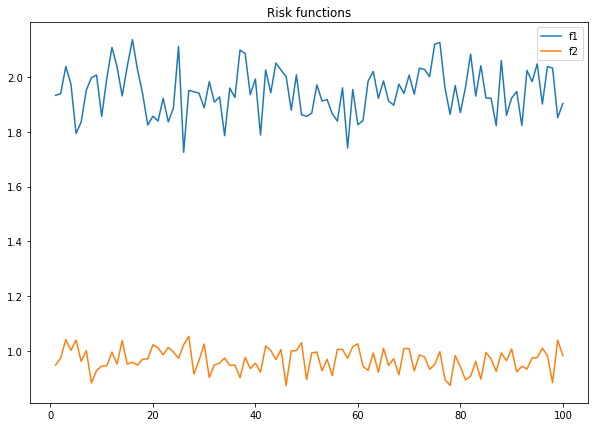

In [130]:
list1=[]
list2=[]


for i in range(100):
    list1.append(risk_1(100, 100))
    list2.append(risk_2(100, 100))
   
 
  
plt.figure(figsize=(10,7))   
plt.plot(range(1,101),list1,label='f1')
plt.plot(range(1,101),list2,label='f2')

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()